In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Add directory above current directory to path
import sys; sys.path.insert(0, '../..'); sys.path.insert(0, '..')

from functions.miscellanea import _unpickle

In [24]:
data = _unpickle('../data/hsic/hsic_test')

In [8]:
def plot_test(ax,test_vals):
    # a row is an experiment
    test_vals = np.array(test_vals)
    means, stds = test_vals.mean(0), test_vals.std(0)
    _, _, _, gamma_test_thresh, pval = means
    _, _, _, gamma_tt_std, pval_std = stds
    X = np.arange(0,test_vals.shape[0])
    # plot all test stats against test index
    ax.scatter(X,test_vals[:,2], s=10, color='black')
    ax.plot(X,gamma_test_thresh*np.ones(X.shape), c='r', lw=4)
    ax.fill_between(X,
                    (gamma_test_thresh+2*gamma_tt_std)*np.ones(X.shape),
                    (gamma_test_thresh-2*gamma_tt_std)*np.ones(X.shape),
                    color='r', lw=4, alpha=0.2)

In [9]:
from functions.miscellanea import _generate_gif

In [18]:
def callback_g(i,ax,data):
    plot_test(ax,data['test_values'][i])
    rho = data['params'][i]
    label = (r"HSIC for $(X,Y)\sim\mathcal{N}(0,\Sigma)$"+
             r",$\quad\Sigma = [1,\rho ; \rho, 1]$"+
             r"  and $\rho="+f"{int(100*rho)/100}$")
    
    ax.set_title(label)
    
def callback_anm(i,ax,data):
    plot_test(ax,data['test_values'][i])
    eps = data['params'][i]
    label = (r"HSIC for $(X,Y)$  with $X\sim $GMM"+
             r"  ,$\quad Y = \varepsilon\cdot f(X) + \mathcal{U}(a,b)$"+
             r"  and  $\varepsilon =" + f"{int(100*eps)/100}$")
    
    ax.set_title(label)

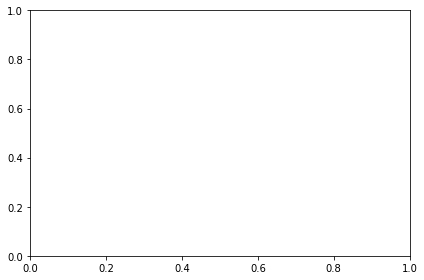

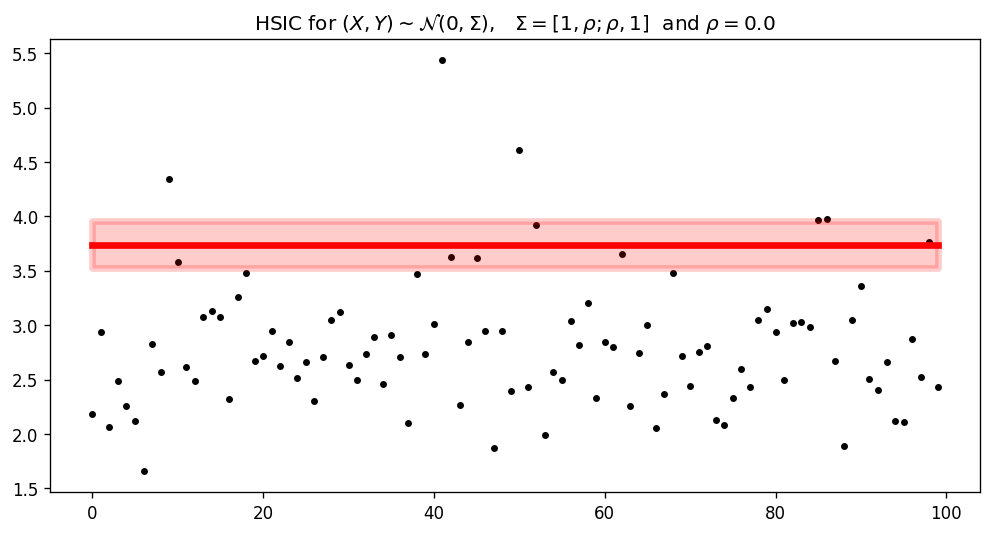

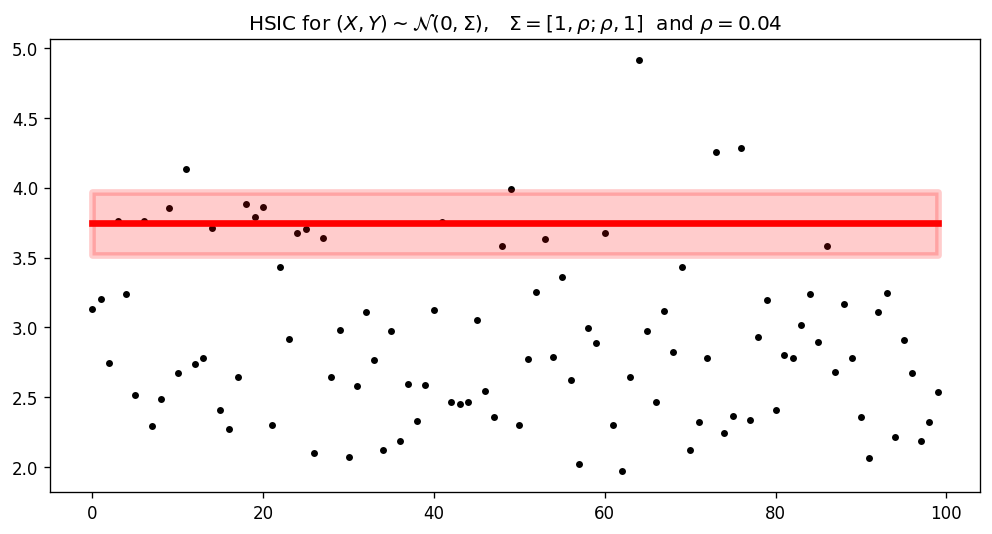

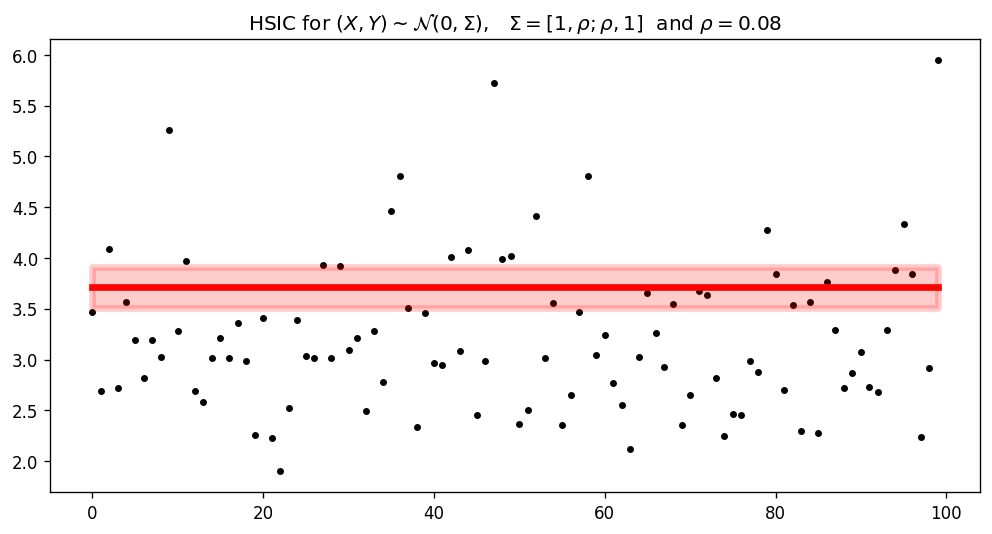

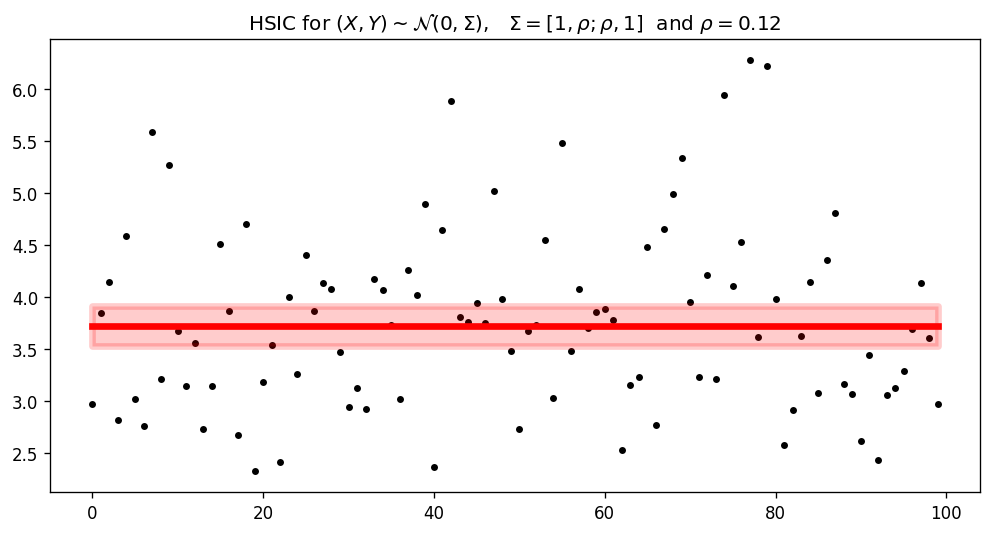

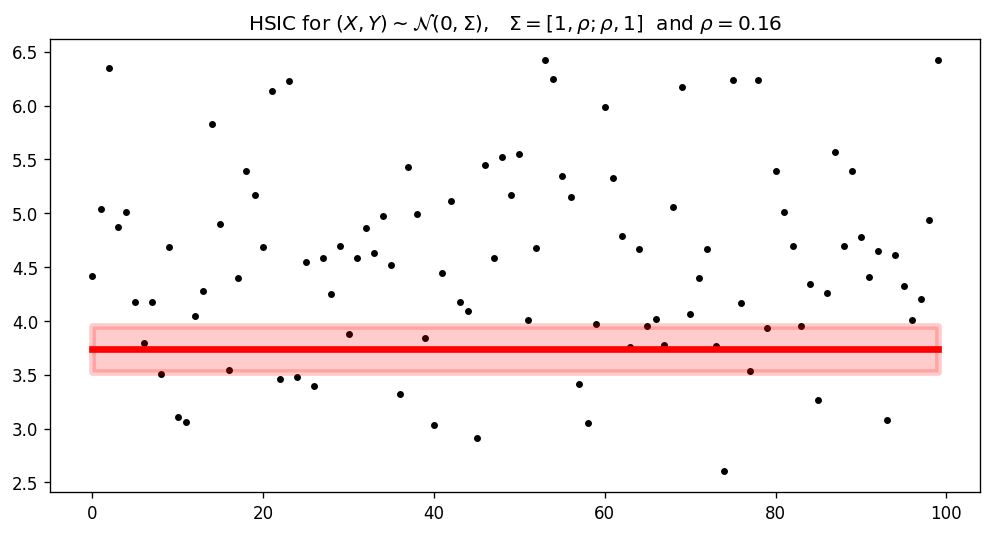

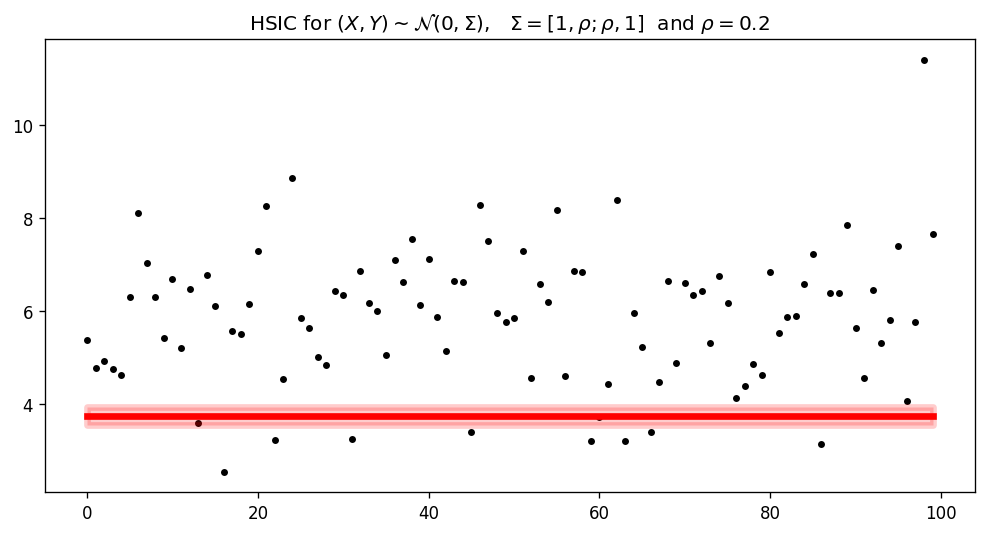

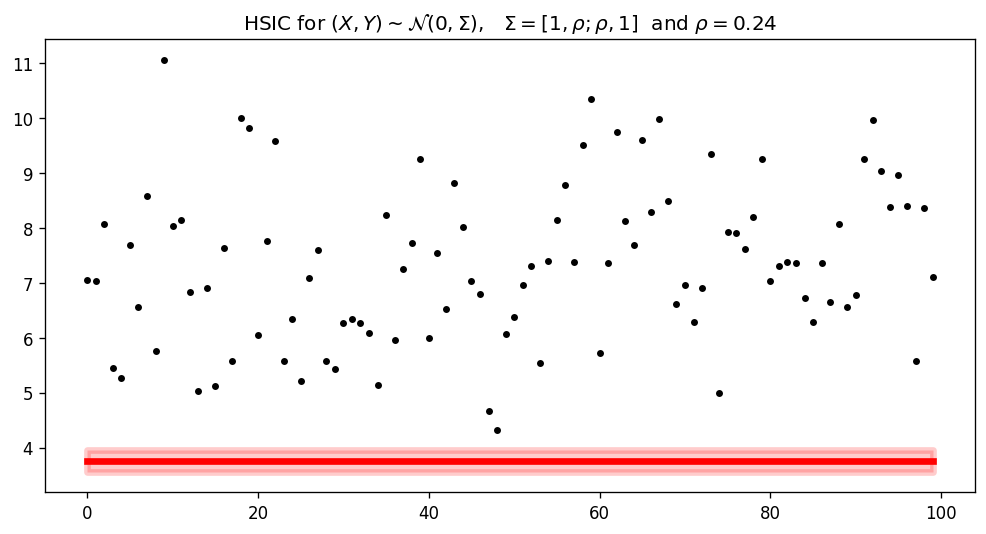

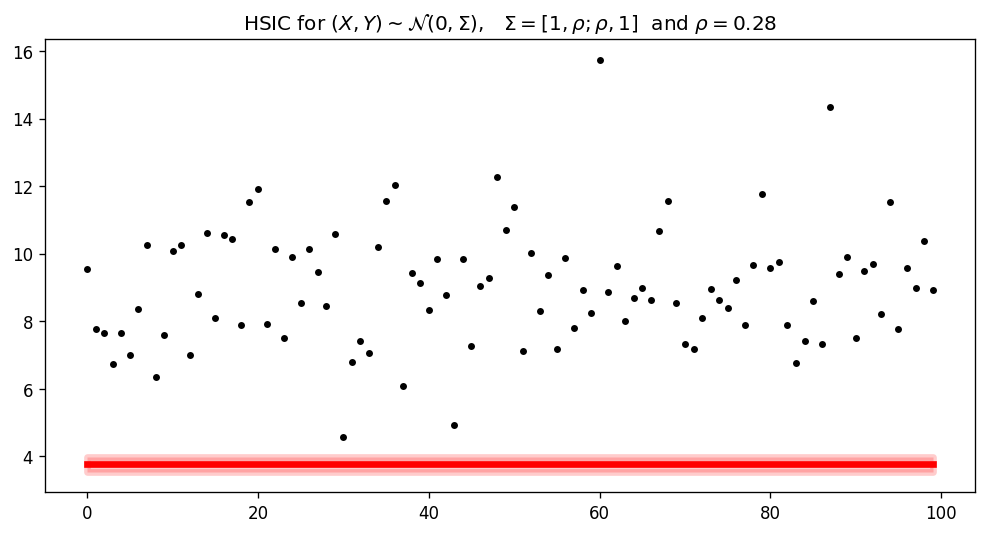

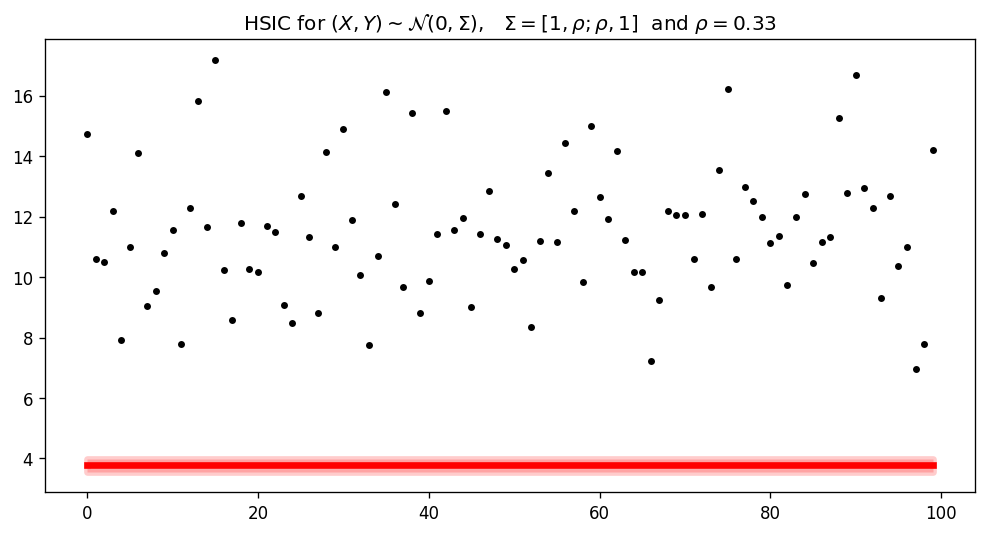

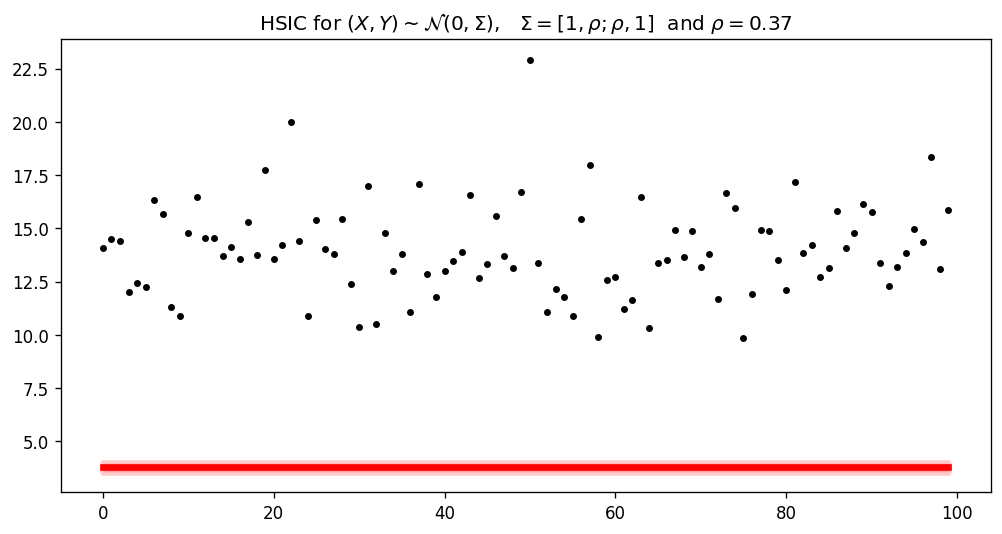

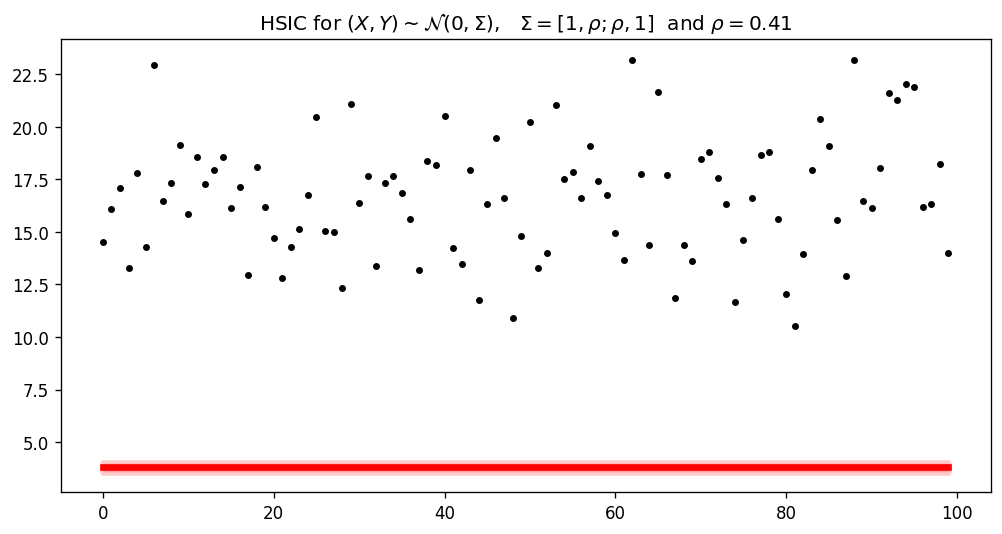

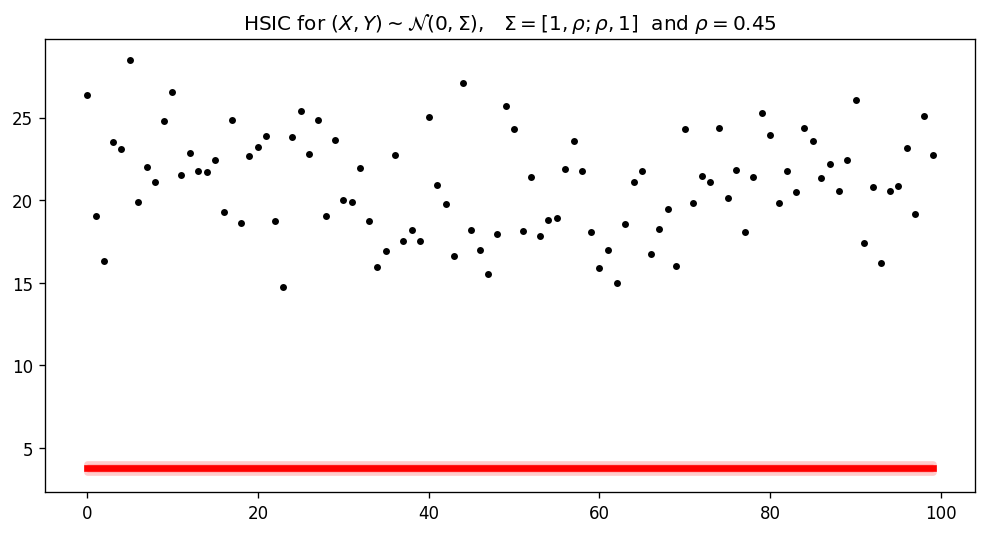

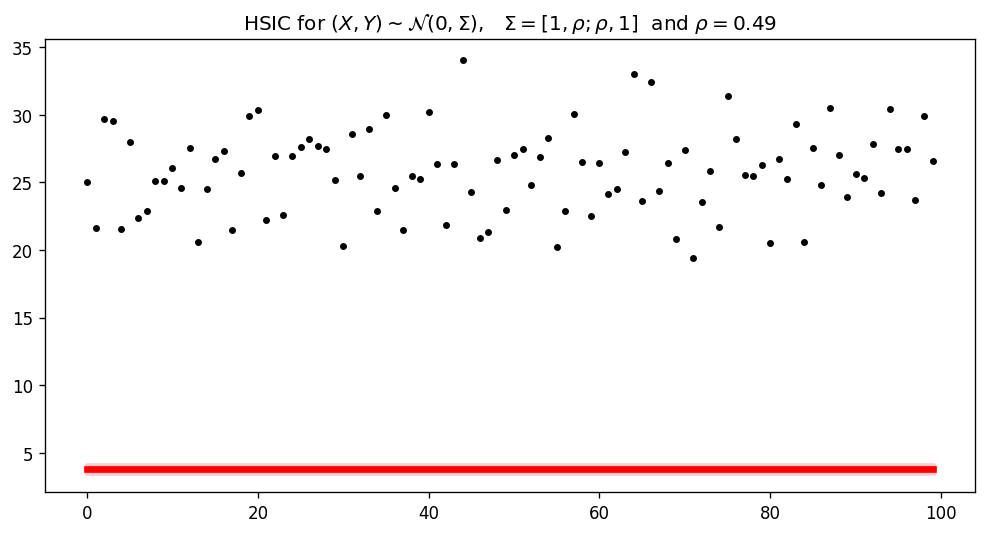

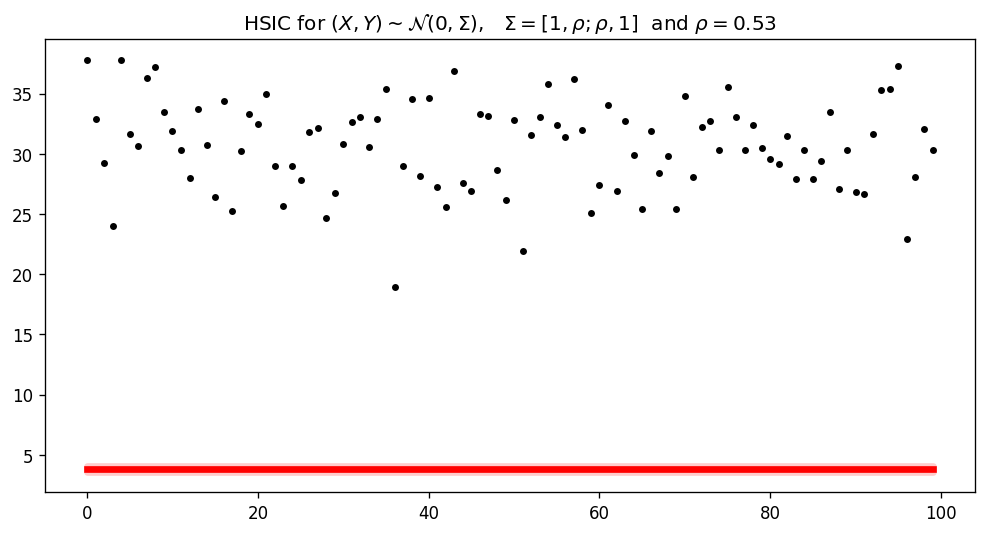

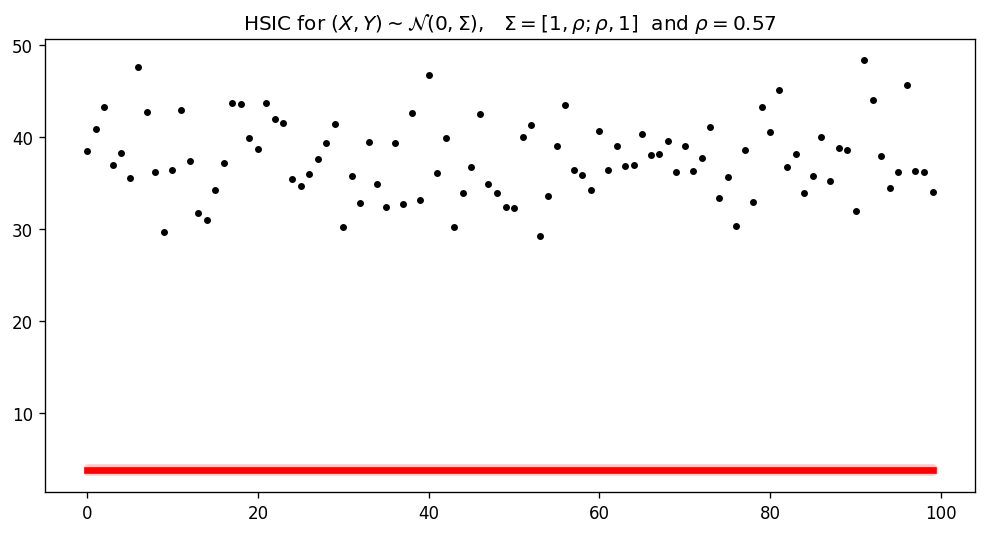

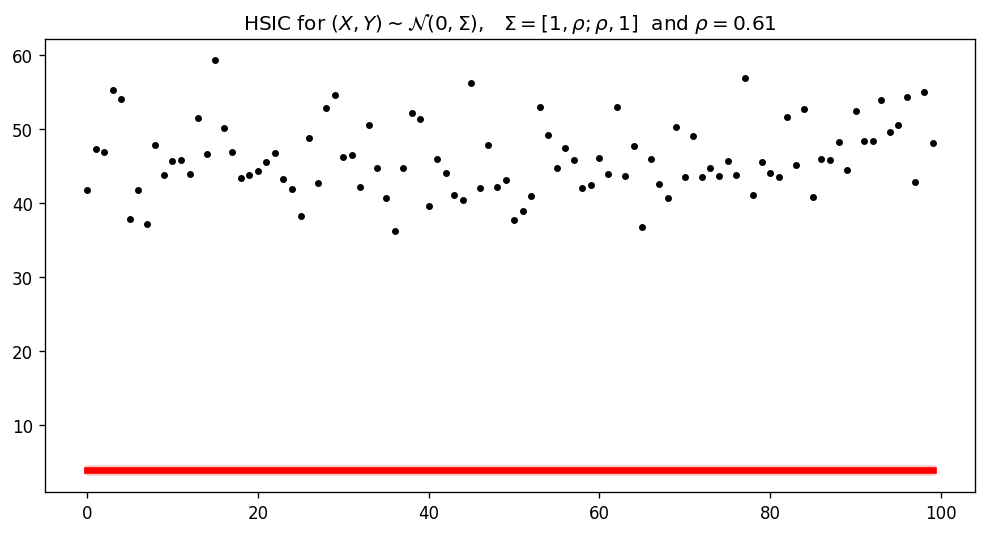

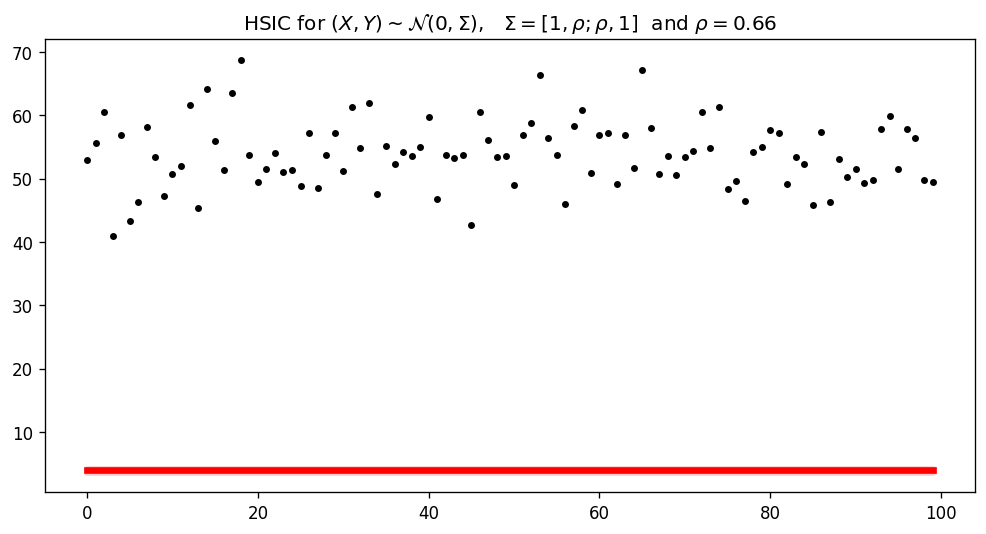

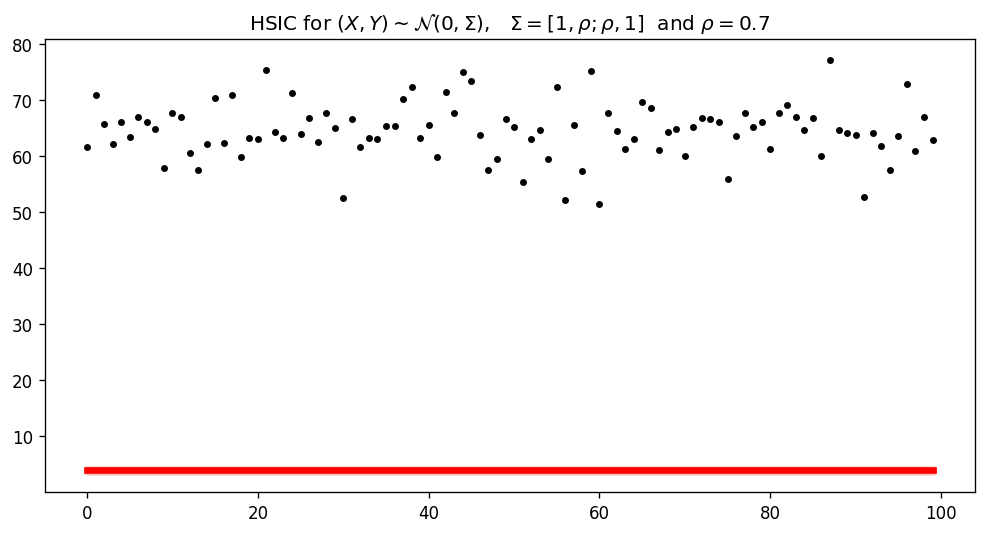

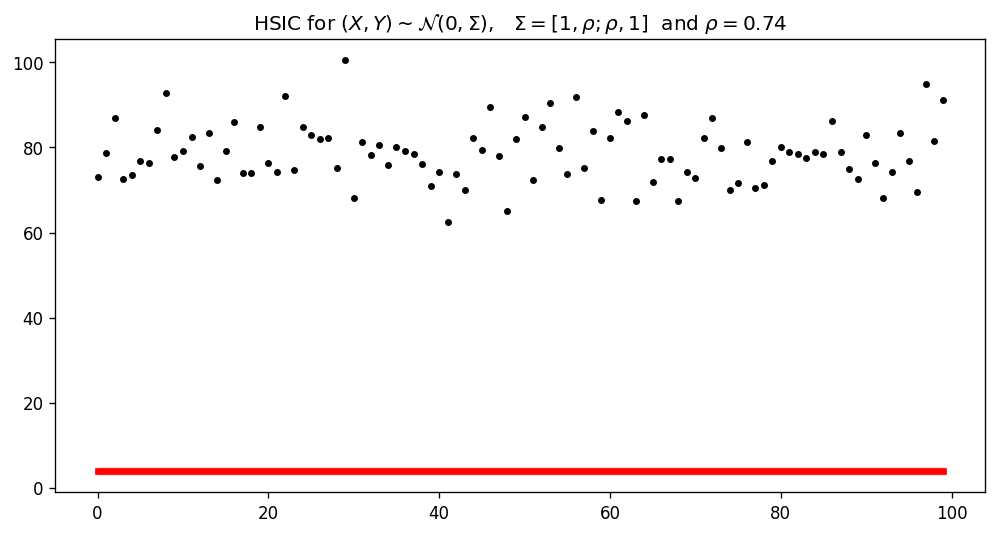

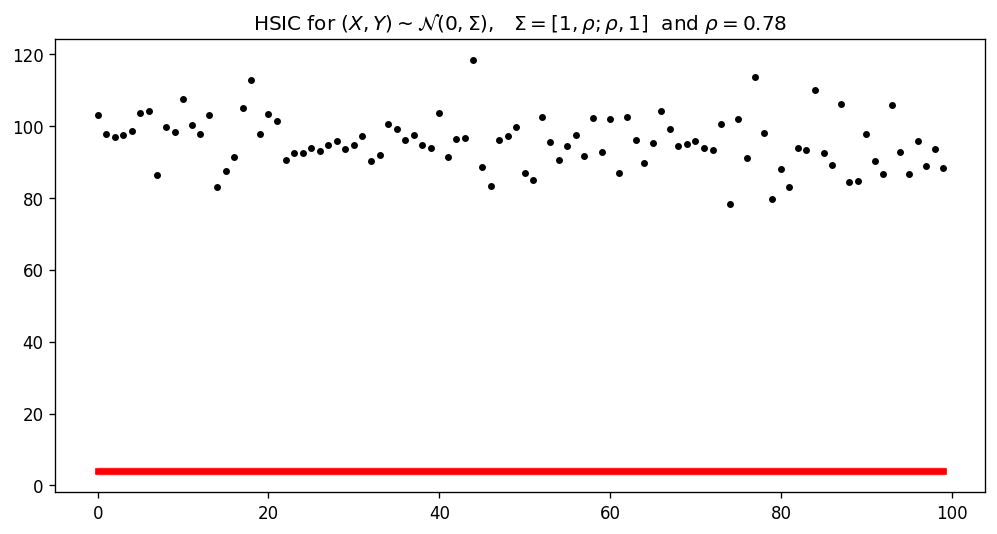

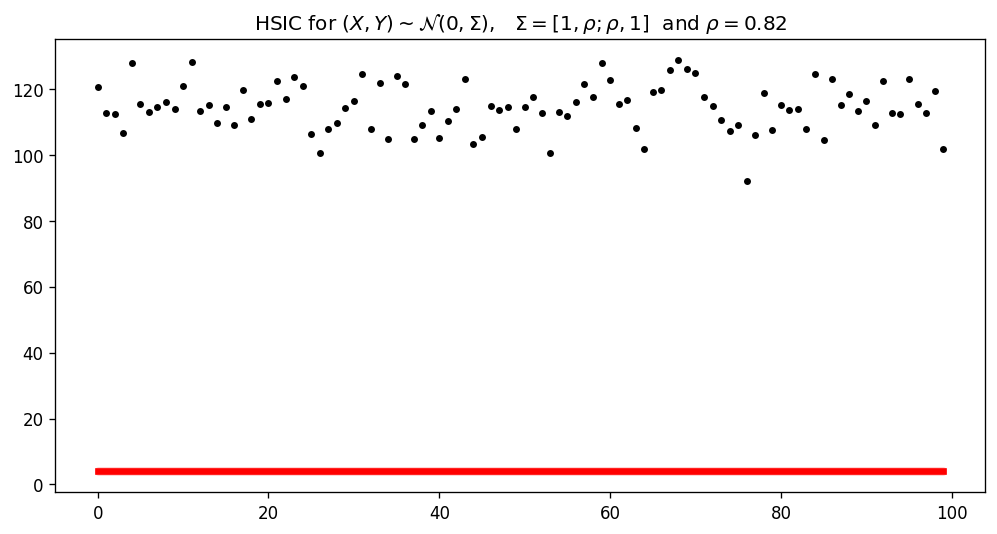

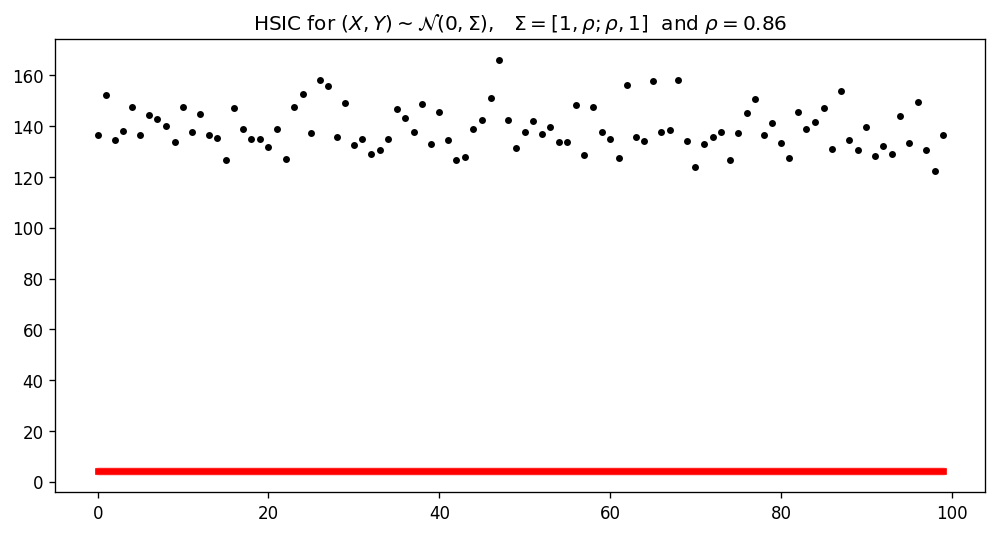

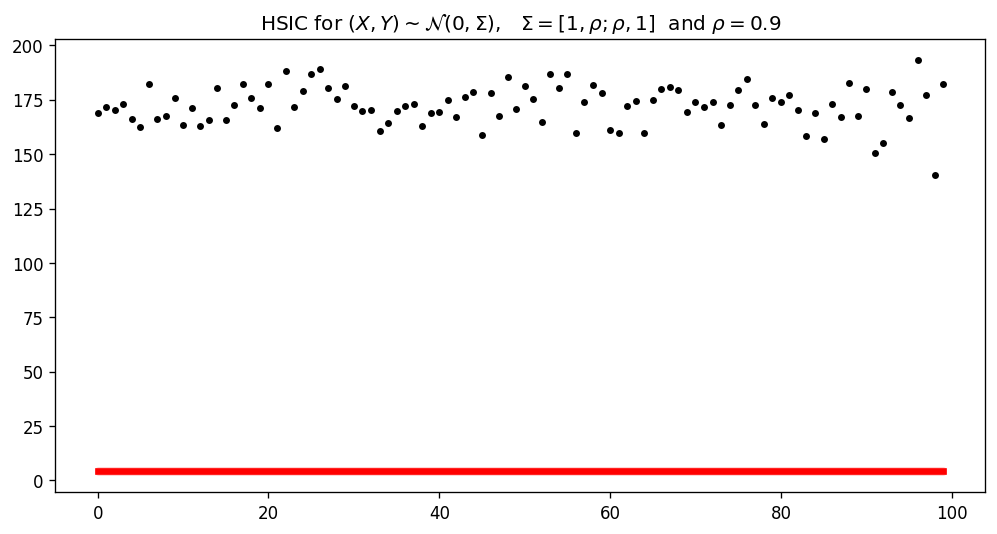

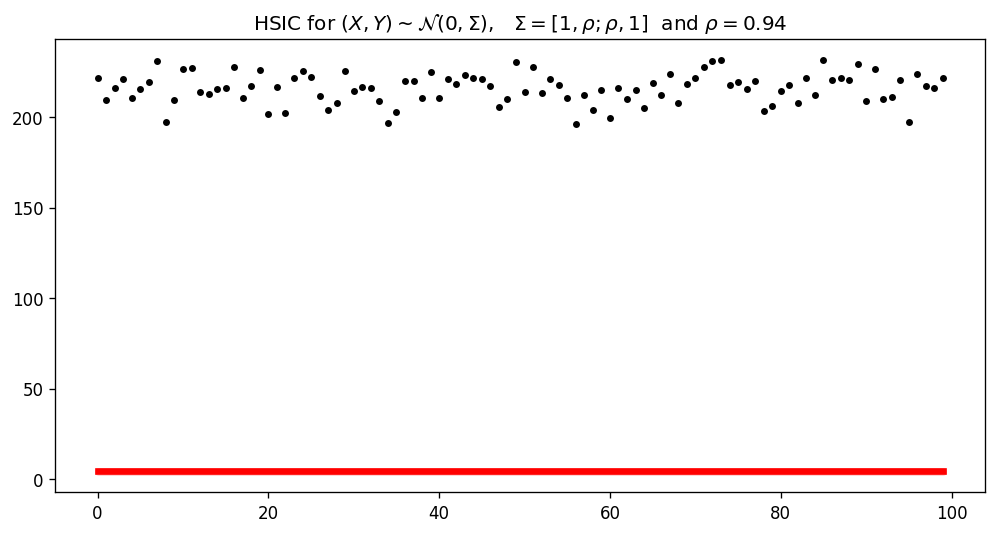

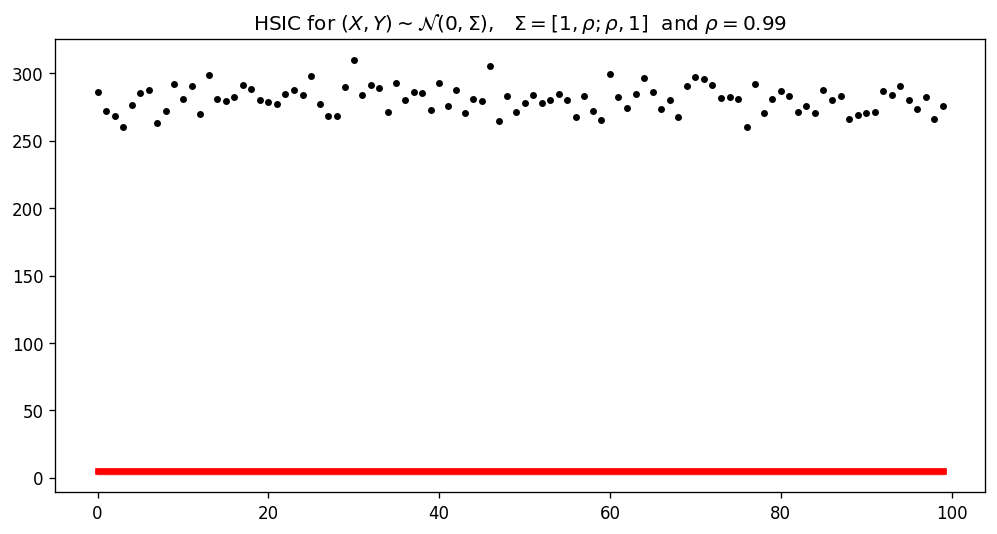

In [25]:
_generate_gif(filepath='../data/hsic/hsic_viz.gif',
              data=data,
              dpi=120,
              callback=callback_g,
              num_frames=len(data['params']),
              fps=1
             )